In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first = session.query(measure).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f87696a6f70>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [10]:
for row in session.query(measure.station, measure.date).limit(10).all():
    print(row)

('USC00519397', '2010-01-01')
('USC00519397', '2010-01-02')
('USC00519397', '2010-01-03')
('USC00519397', '2010-01-04')
('USC00519397', '2010-01-06')
('USC00519397', '2010-01-07')
('USC00519397', '2010-01-08')
('USC00519397', '2010-01-09')
('USC00519397', '2010-01-10')
('USC00519397', '2010-01-11')


In [11]:
first = session.query(station).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f876682fb50>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [12]:
# Find the most recent date in the data set.
recent = session.query(measure.date).order_by(measure.date.desc()).first()
recent

('2017-08-23',)

In [13]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [14]:
current = dt.date(2017, 8, 23)
current

datetime.date(2017, 8, 23)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# See Above

# Calculate the date one year from the last date in data set.
year_prior = current - dt.timedelta(days=365)
print(year_prior)

# Perform a query to retrieve the data and precipitation scores
year_prior_precip = session.query(measure.date, measure.prcp).\
    filter(measure.date >= year_prior).\
    filter(measure.date <= current).\
    order_by(measure.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(year_prior_precip)
precip1_df = precip_df.dropna(how='any')
precip1_df

# Sort the dataframe by date

2016-08-23


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


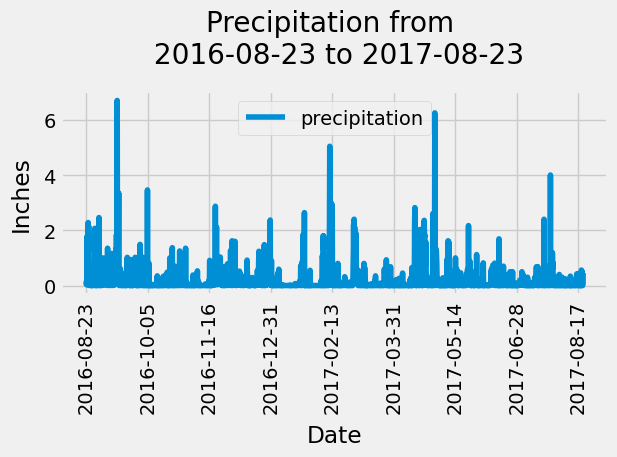

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precip1_df.plot('date', 'prcp')
font = {'weight': 'bold', 'size': '8'}
plt.style.use('fivethirtyeight')
plt.xlabel("Date", labelpad=8)
plt.ylabel("Inches", labelpad=8)
plt.title(f'Precipitation from \n {year_prior} to {current}', pad=20)
plt.legend(["precipitation"], loc='best')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("precipitation.png")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip1_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
station_no = session.query(station.station).count()
station_no

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_act = session.query(func.count(measure.id), measure.station).\
    group_by(measure.station).\
    order_by(func.count(measure.id).desc()).all()
   
for x in station_act:
    print(x)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_station = session.query(station.name, func.min(measure.tobs)\
    , func.max(measure.tobs)\
    , func.round(func.avg(measure.tobs),2)).\
    filter(measure.station == station.station).\
    filter(measure.station == 'USC00519281').all()
most_act_station

[('WAIHEE 837.5, HI US', 54.0, 85.0, 71.66)]

In [21]:
most_act_station_tmp = session.query(station.name, measure.date, measure.tobs).\
    filter(measure.station == station.station).\
    filter(measure.station == 'USC00519281').\
    filter(measure.date >= year_prior).\
    filter(measure.date <= current).\
    filter(measure.tobs != 'None').\
    order_by(measure.date).all()

In [22]:
most_act_df = pd.DataFrame(most_act_station_tmp)
most_act_df

,name,date,tobs
0,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,"WAIHEE 837.5, HI US",2016-08-27,75.0
...,...,...,...
347,"WAIHEE 837.5, HI US",2017-08-14,77.0
348,"WAIHEE 837.5, HI US",2017-08-15,77.0
349,"WAIHEE 837.5, HI US",2017-08-16,76.0
350,"WAIHEE 837.5, HI US",2017-08-17,76.0


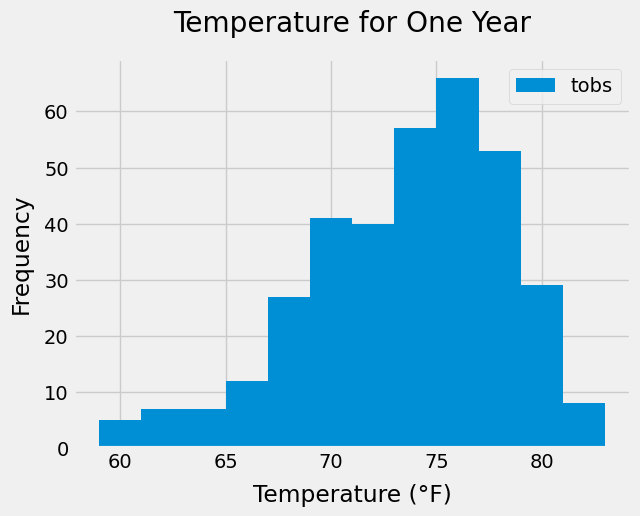

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_act_station_tmp = session.query(measure.date, measure.tobs).\
    filter(measure.station == 'USC00519281').\
    filter(measure.date >= year_prior).\
    filter(measure.date <= current).\
    order_by(measure.date).all()

most_act_df = pd.DataFrame(most_act_station_tmp)

import scipy.stats as st
plt.hist(most_act_df['tobs'], bins=12)
plt.title('Temperature for One Year', pad=20)
plt.legend(['tobs'], loc='upper right')
plt.xlabel('Temperature (°F)', labelpad=8)
plt.ylabel('Frequency', labelpad=8)
plt.savefig("temperature.png")
plt.show()

# Close session

In [24]:
# Close Session
session.close()